### Prepare Environments && Import Data

##### Source of Dataset by https://drive.google.com/file/d/1HXygNpBm3ItzXdLdOLB6FOl8GbJrsfDX/view?usp=sharing

In [ ]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

## import file

with open('BOT_od_2018-11-02.csv', 'r') as file:
    array = file.readlines()
    array = [row.split(';') for row in array]

In [197]:
## Create DF 

f2 = pd.DataFrame(array,index =None,columns= ['id','type_desc','kind_desc','subkind_desc','seat','weight','traveltime','km','ts1','lat1','lon1','ts2','lat2','lon2'])
data = f2.drop(index=0)

In [198]:
## Clearing Data & Convert Type

data = data.loc[(data['seat'] != "NULL") 
                & (data['weight'] != "NULL") 
                & (data['weight'] != "ยาง 6 เส้น                 ")
                & (data['weight'] != "ยาง 10 เส้น                ") 
                & (data['weight'] != "ยาง 12 เส้น                ")]

In [199]:
## Clearing Data & Convert Type

data['id'] = data['id'].astype(int)
data['seat'] = data['seat'].astype(int)
data['weight'] = data['weight'].astype(int)
data['km'] = data['km'].astype(float)
data['ts1'] = data['ts1'].astype('datetime64[ns]')
data['ts2'] = data['ts2'].astype('datetime64[ns]')
data['lat1'] = data['lat1'].astype(float)
data['lon1'] = data['lon1'].astype(float)
data['lat2'] = data['lat2'].astype(float)
data['lon2'] = data['lon2'].astype(float)

In [146]:
## Clearing Data & Convert Type

## NOTE....
# Lat thai 5-20
# Long thai 92-105 

# data = data.loc[(data['lat1'] < 20) 
#                 & (data['lat1'] > 5)
#                 & (data['lon1'] > 92)
#                 & (data['lon1'] < 105)]

### Problem 

###### ผู้ประกอบการปั๊มน้ำมัน ต้องการจะขยายกิจการสาขา เพิ่มในบริเวณภาคตะวันออก จึงอยากทราบปริมาณของรถที่สัญจร ในช่วงเวลา 2 สัปดาห์
###### ช่วงเวลา ประกอบไปด้วย 2 ช่วง คือ ช่วงกลาง : 6:00 AM - 5:59 PM และ ช่วงกลางคืน 6:00 PM - 5:59 AM

In [225]:
carType = data.groupby("type_desc")[["lat1","lon1"]].min()
carType # only show type_desc

,lat1,lon1
type_desc,,
รถบรรทุกส่วนบุคคล,5.785380,97.738372
รถบรรทุกไม่ประจำทาง,5.771925,97.909745
รถโดยสารประจำทาง,5.745498,0.033333
รถโดยสารส่วนบุคคล,7.132375,98.293592
รถโดยสารไม่ประจำทาง,5.748178,0.000000


### Select Time Preiod

In [200]:
## Query by Time and type

tDay = data[(data['ts1'] >= '2018-11-02 06:00:00') 
            & (data['ts1'] <= '2018-11-02 17:59:59')]
#             & (data['type_desc']== "รถโดยสารไม่ประจำทาง")]

# tDay.sort_values(by="id",ascending=True).groupby("id")[["ts1"]].min()

# len(tDay) # 76994 
### --------------------------------------------------------------------------------------------

# tNight = data[((data['ts1'] >= '2018-11-02 00:00:00') & (data['ts1'] <= '2018-11-02 05:59:59'))
#     | ((data['ts1'] > '2018-11-02 18:00:00') & (data['ts1'] <= '2018-11-02 23:59:59'))]

# tNight.sort_values(by="id",ascending=True).groupby("id")[["ts1"]].min()
# tNight

# len(tNight) # 107487
### --------------------------------------------------------------------------------------------

# len(tDay+tNight) #341814

In [201]:
## Reduce Attr

tDay = data.drop(["type_desc","kind_desc","subkind_desc","seat","weight","traveltime","km"] ,axis=1)

### --------------------------------------------------------------------------------------------

# tNight = data.drop(["type_desc","kind_desc","subkind_desc","seat","weight","traveltime","km"] ,axis=1)

### Plot Data after cleaning data 

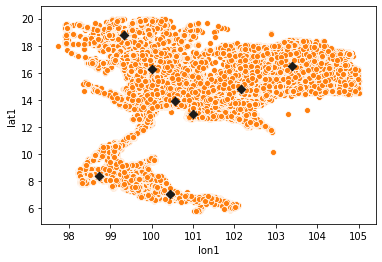

In [13]:
## Clustering by KMeans

from sklearn.cluster import KMeans
model = KMeans(n_clusters=8)
model
dataSet = tDay[['lon1','lat1']]
model.fit(dataSet)
model.cluster_centers_
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1])
sns.scatterplot(x="lon1", y="lat1", data=tDay)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='.1',marker='D')

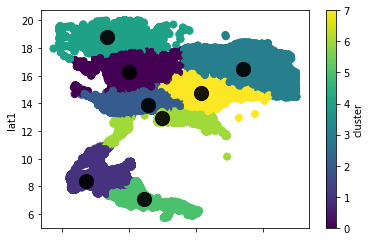

In [14]:
model.labels_
## ADD new Columns
tDay['cluster']=model.labels_
tDay.plot.scatter(x = 'lon1', y = 'lat1', c='cluster', s=50, cmap='viridis')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], c='black', s=200, alpha=0.9)

In [15]:
tDay['cluster'].value_counts()

2    166306
6     59094
1     39614
7     17874
3     17740
0     15252
4     15171
5     10763
Name: cluster, dtype: int64

In [62]:
tDay.loc[(tDay['cluster'] == 7)]

,id,ts1,lat1,lon1,ts2,lat2,lon2,cluster
47966,89787,2018-11-02 06:00:54,13.460428,101.055922,2018-11-02 06:12:01,13.408113,101.001288,7
47968,209737,2018-11-02 06:01:52,13.667333,102.540000,2018-11-02 06:11:57,13.663500,102.548167,7
48546,120206,2018-11-02 06:02:12,12.694604,101.221314,2018-11-02 06:15:59,12.695744,101.250504,7
48554,183074,2018-11-02 06:05:29,13.377776,101.016502,2018-11-02 06:15:34,13.382216,101.018745,7
48580,222483,2018-11-02 06:01:32,12.883755,100.880026,2018-11-02 06:12:50,12.881241,100.882100,7
...,...,...,...,...,...,...,...,...
605516,121996,2018-11-02 06:12:52,12.575528,99.911078,2018-11-02 06:26:03,12.640856,99.948752,7
605534,79258,2018-11-02 16:07:18,13.433860,101.044030,2018-11-02 16:31:12,13.437610,101.026580,7
605573,104039,2018-11-02 07:55:31,13.039686,101.123386,2018-11-10 10:13:43,13.111126,100.948750,7
605583,61045,2018-11-02 10:46:39,13.435841,101.017269,2018-11-02 11:30:51,13.445079,101.109910,7


### Before Test

#### Select Only ' East Area '

In [202]:
## Area EAST

# rydaa = tDay.loc[tDay['cluster']==6]
rydaa = tDay.loc[(tDay['lat1']>12)&(tDay['lon1']<103)& (tDay['lat1']<14)&(tDay['lon1']>100.7)]
# rydaa = rydaa.loc[(rydaa['lat1']>12)&(rydaa['lon1']<103)& (rydaa['lat1']<14)&(rydaa['lon1']>100.7)]
# sns.scatterplot(x="lon1", y="lat1", data=rydaa)

In [203]:
from sklearn.cluster import KMeans
modelEast = KMeans(n_clusters=3)
dataSet = rydaa[['lon1','lat1']]
modelEast.fit(dataSet)
modelEast.cluster_centers_
# plt.scatter(modelEast.cluster_centers_[:,0],modelEast.cluster_centers_[:,1])
# sns.scatterplot(x="lon1", y="lat1", data=rydaa)
# plt.scatter(modelEast.cluster_centers_[:,0],modelEast.cluster_centers_[:,1],color='.1',marker='D')

array([[102.22874566,  13.01824769],
       [100.94429967,  13.65108222],
       [101.04101538,  12.97915063]])

In [221]:
rydaa['cluster_AMP']=modelEast.labels_

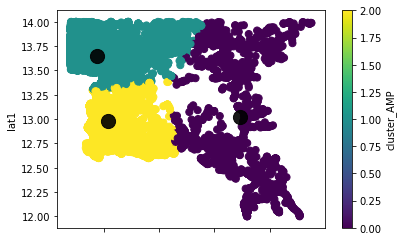

In [206]:
rydaa.plot.scatter(x = 'lon1', y = 'lat1', c='cluster_AMP', s=50, cmap='viridis')
plt.scatter(modelEast.cluster_centers_[:,0],modelEast.cluster_centers_[:,1], c='black', s=200, alpha=0.9)

### Start Test

###### chang area : Focus Area

In [207]:
ccsdata = rydaa.loc[rydaa['cluster_AMP']==1] #CCS
# cbdata = rydaa.loc[rydaa['cluster_AMP']==2] #CB
# rydata = rydaa.loc[rydaa['cluster_AMP']==2] #RY

### Import Data for clustering with Focus Area

In [208]:
## Import province

df = pd.read_csv (r'C:\Users\61601198\Desktop\Python\mapRoad\tambon.csv')
df = df.dropna()
ry = df.loc[(df['CHANGWAT_E']=='Rayong')]

# cb = df.loc[(df['CHANGWAT_E']=='Chon Buri')]

# ccs = df.loc[(df['CHANGWAT_E']=='Chanthaburi')]



modelTest = KMeans(n_clusters=8)
dataSet = ry[['LONG','LAT']]

# modelTest = KMeans(n_clusters=11)
# dataSet = cb[['LONG','LAT']]

# modelTest = KMeans(n_clusters=10)
# dataSet = ccs[['LONG','LAT']]

modelTest.fit(dataSet)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [209]:
modelTest.cluster_centers_

array([[101.09666667,  12.80483333],
       [101.472875  ,  12.653625  ],
       [101.647     ,  12.61733333],
       [101.57355556,  12.93733333],
       [101.24433333,  12.98433333],
       [101.21661538,  12.68623077],
       [101.35677778,  12.79544444],
       [101.7106    ,  12.7855    ]])

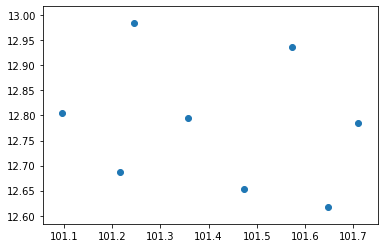

In [210]:
plt.scatter(modelTest.cluster_centers_[:,0],modelTest.cluster_centers_[:,1])

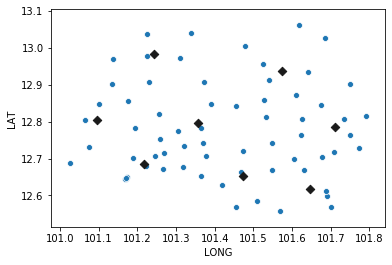

In [211]:
sns.scatterplot(x="LONG", y="LAT", data=ry)
# sns.scatterplot(x="LONG", y="LAT", data=cb)
# sns.scatterplot(x="LONG", y="LAT", data=ccs)

plt.scatter(modelTest.cluster_centers_[:,0],modelTest.cluster_centers_[:,1],color='.1',marker='D')

In [222]:
ry['cluster']=modelTest.labels_


# cb['cluster']=modelTest.labels_
# cb

# ccs['cluster']=modelTest.labels_
# ccs

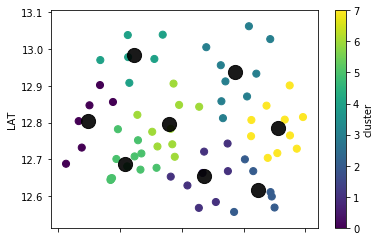

In [213]:
ry.plot.scatter(x = 'LONG', y = 'LAT', c='cluster', s=50, cmap='viridis')
plt.scatter(modelTest.cluster_centers_[:,0],modelTest.cluster_centers_[:,1], c='black', s=200, alpha=0.9)

# cb.plot.scatter(x = 'LONG', y = 'LAT', c='cluster', s=50, cmap='viridis')
# plt.scatter(modelTest.cluster_centers_[:,0],modelTest.cluster_centers_[:,1], c='black', s=200, alpha=0.9)

# ccs.plot.scatter(x = 'LONG', y = 'LAT', c='cluster', s=50, cmap='viridis')
# plt.scatter(modelTest.cluster_centers_[:,0],modelTest.cluster_centers_[:,1], c='black', s=200, alpha=0.9)

In [214]:
pd.crosstab(ry['AMPHOE_E'],ry['cluster'])

# pd.crosstab(cb['AMPHOE_E'],cb['cluster'])

# pd.crosstab(ccs['AMPHOE_E'],ccs['cluster'])

cluster,0,1,2,3,4,5,6,7
AMPHOE_E,,,,,,,,
Ban Chang,3,0,0,0,0,0,0,0
Ban Khai,0,0,0,0,0,1,6,0
Khao Chamao,0,0,0,3,0,0,0,1
Klaeng,0,3,6,2,0,0,0,9
Mueang Rayong,0,5,0,0,0,11,3,0
Nikhom Phatthana,3,0,0,0,0,1,0,0
Pluak Daeng,0,0,0,0,6,0,0,0
Wang Chan,0,0,0,4,0,0,0,0


In [220]:
ry.groupby('cluster')['AMPHOE_E'].agg(pd.Series.mode)

# cb.groupby('cluster')['AMPHOE_E'].agg(pd.Series.mode)

# ccs.groupby('cluster')['AMPHOE_E'].agg(pd.Series.mode)

cluster
0      Ban Chang
1         Klaeng
2         Klaeng
3    Khao Chamao
4    Pluak Daeng
5       Ban Khai
6       Ban Khai
7    Khao Chamao
Name: AMPHOE_E, dtype: object

### After Create Model by Focus Area
##### Next Predict via Data after cleaning at top before...

In [218]:
## Predict

import collections
result = modelTest.predict(
#     cbdata[['lon1','lat1']].values
#     ccsdata[['lon1','lat1']].values
    rydata[['lon1','lat1']].values
    
)
collections.Counter(result)

Counter({0: 17000, 4: 16951, 5: 3976, 6: 735, 3: 229, 1: 546, 7: 134, 2: 83})